<a href="https://colab.research.google.com/github/Bao1972002/Nguyen-Hai-Quoc-Bao-20104016/blob/main/nhan_dien_do_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!jupyter nbconvert --to html /content/nhan-dien-do-an.ipynb

[NbConvertApp] Converting notebook /content/nhan-dien-do-an.ipynb to html
[NbConvertApp] Writing 413413 bytes to /content/nhan-dien-do-an.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')  

Mounted at /content/drive/


In [ ]:
import os
train_image_files_path ='/content/drive/MyDrive/nhận-diện-đồ-ăn/Data/Train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
label = ['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']

In [ ]:
train_generator = train_datagen.flow_from_directory(train_image_files_path,target_size=(200,200),class_mode='categorical')

Found 887 images belonging to 10 classes.


In [ ]:
x_train,y_train=next(train_generator)

In [ ]:
x_train.shape

(32, 200, 200, 3)

In [ ]:
y_train.shape

(32, 10)

In [ ]:
x_train=x_train.reshape(32,120000)
x_train=x_train.astype ('float32')
x_train=x_train/255
x_train.shape

(32, 120000)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (120000,)))
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 50, batch_size = 128)

1/1 [==============================] - 0s 76ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 64ms/step
Đây là: banh_cong


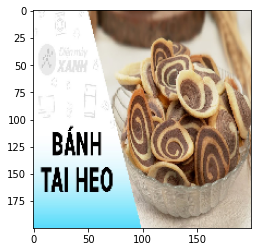

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array,load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
img = load_img('/content/drive/MyDrive/nhận-diện-đồ-ăn/Data/Test/banh_tai_heo/banh_tai_heo1.jpg',target_size=(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.astype('float32')
img= img.reshape(1,200*200*3)
img = img/255
print(model.predict(img))
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là:", label[a])